# Salary Notebook Assignment 1

### In the next series of challenges, we will predict employee salaries from different employee characteristics (or features). We ask employees working in four different fields to state their salary and some background information. 

### Import the data salary.csv to a Jupyter Notebook and answer the following questions:


In [166]:
import pandas
import numpy as np
import matplotlib.pyplot as plt

In [3]:
salary = pandas.read_csv("salary.csv")

### Q1 a)	How many responders are there? Are there any missing values in any of the variables?

In [123]:

print("There are " + str(len(salary)) + " respondents recorded in the data file.")
print("Are there any null values: " + str(salary.isnull().values.any()))
print("Number of null values: " + str(salary.isnull().sum().sum()))

There are 514 respondents recorded in the data file.
Are there any null values: True
How many null values:1


### >>> There are 514 respondents in the data file. There is one null value in the records.

### Q1b)	What is the lowest salary and highest salary in the group?

In [95]:
salary.min()

salary         29000.00
exprior            0.00
yearsworked        0.00
yearsrank          0.00
market             0.71
degree             0.00
otherqual          0.00
position           1.00
male               0.00
Field              1.00
yearsabs           0.00
dtype: float64

In [96]:
salary.max()

salary         96156.00
exprior           25.00
yearsworked       41.00
yearsrank         28.00
market             1.33
degree             1.00
otherqual          1.00
position           3.00
male               1.00
Field              4.00
yearsabs         118.00
dtype: float64

### >>> The lowest salary is 29 000. The highest salary is 96 156.

### Q1c)	What is the mean salary for the sample? Include the standard error of the mean.

In [97]:
salary['salary'].mean()

50863.22009783625

In [98]:
salary['salary'].sem()

560.0622753925232

### >>> The mean salary is 50 863.22. The standard error of the mean is 560.06.

### Q1d)	What is the standard deviation for the years worked?

In [99]:
salary['yearsworked'].std()

9.444695144169803

### >>> The standard deviation for the years worked is 9.44.

### Q1e)	What is the median salary for the sample?

In [100]:
salary['salary'].median()

50096.0

### >>> The median for the salary is 50 096.

### Q1f)	What is the interquartile range for salary in the sample?

In [101]:
print("Low interquatile range: " + str(salary['salary'].quantile(.25)))
print("High interquatile range: " + str(salary['salary'].quantile(.75)))

Low interquatile range: 40000.0
High interquatile range: 60345.0


### >>> The interquartile range is between 40 000  and 60 345

### Q1g)	How many men are there in the sample? How many women are there in the sample? Present this information in a table. 

In [104]:
males = salary[salary.male == 1]
females = salary[salary.male == 0]

In [101]:
df = pandas.DataFrame([[len(males), len(females)]])
df. columns = [['Males','Females']]
df

,Males,Females
0,386,128


### >>> There are 386 men, and 128 women in the sample.

### Q1h)	How many women are executives compared to men? 

In [105]:
male_execs = males[males['position'] == 3]
fem_execs = females[females['position']  == 3]
#print('{:20} {}'.format('Male Executives', 'Female Executives'))
#print('{:20} {}'.format(str(len(male_execs)), str(len(fem_execs))))

In [106]:
df = pandas.DataFrame([[len(male_execs), len(fem_execs)]])
df. columns = [['Male Executives','Female Executives']]
df

,Male Executives,Female Executives
0,192,19


### >>> There are 192 male and 19 female executives.

### Q1i)	Create a histogram for the variable Salary.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000008DDF50FBA8>]],
      dtype=object)

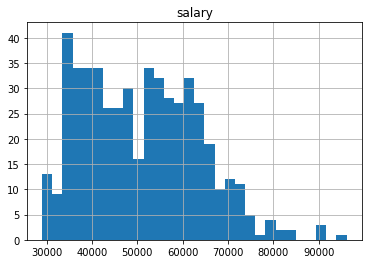

In [79]:
salary.hist(column='salary', bins=30)

### Q1j)	Examine the histogram and describe the distribution for Salary.

### >>> Most of the people sampled have a salary between 35k and about 65k.

### Q1k)	Create a bar graph to show the different average salaries of men and women. (Bonus: Add error bars to the bars showing the 95% confidence interval). What does the graph tell you about the difference between men and women’s salaries? 

### >>> First let's drop the row that contains an invalid value in the male's salaries...

In [111]:
index = 0
for sal in males.salary:
    if (str(sal).replace('.','',1).isdigit() == False):
        males.drop(index)
        index -= 1
    index += 1

In [222]:
labels = ['Male Salaries', 'Female Salaries']
height = [np.mean(males.salary), np.mean(females.salary)]

std = pandas.DataFrame(height).std()

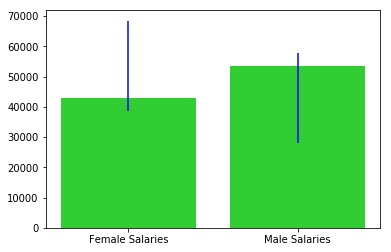

In [223]:
plt.errorbar(0, np.mean(males.salary), yerr=2*std, color='blue')
plt.errorbar(1, np.mean(females.salary), yerr=2*std, color='blue')

plt.bar(x = labels, height = height, color='limegreen')
plt.show()

### l)	Create a scatterplot showing the relationship between Years Worked and Salary (don’t forget to insert a trend line). What is the relationship between Years Worked and Salary?

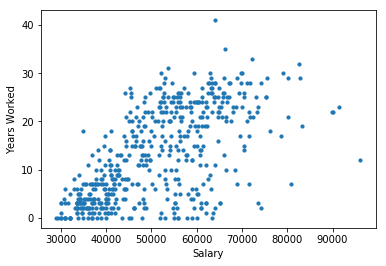

In [287]:
dic = {'Salary': salaries, 'Years Worked': yearsworked}
df = pandas.DataFrame(dic)
df.plot(kind='scatter', x='Salary', y='Years Worked', s=10)
# I'm still going to add a trendline...